<h1 style="text-align:center">PROGRAMACIÓN LINEAL </h1>

# MÉTODO SIMPLEX
Surgió en la 2da guerra mundial desarrollado por el matemático George Dantzing en el año de 1947.
## EL PROBLEMA
Un autobús que hace el recorrido Cali-Buga, ofrece asientos para fumadores al precio de 10.000 pesos y a no fumadores al precio de 6.000 pesos. Al no fumador se le deja llevar 50 Kg. de peso y al fumador 20 Kg. Si el autobús tiene 90 asientos y admite un equipaje de hasta 3.000 Kg. ¿Cuál ha de ser la oferta de asientos de la compañía para cada tipo de pasajeros, con la finalidad de optimizar el beneficio? Además, debe considerarse que por políticas de la empresa, deben ofrecerse cómo mínimo 10 asientos para pasajeros no fumadores.

### Modelamiento mediante programación lineal
#### Variables

$x$: Cantidad de asientos reservados a fumadores.

$y$: Cantidad de asientos reservados a no fumadores.

#### Restricciones

$20x + 50y \leq 3000$ (Equipaje permitido)

$x + y \leq 90$ (Cantidad de asientos disponibles)

$y \geq 10$ (Política de asientos mínimos para no fumadores)

$y \geq 0$ (No negatividad)

$x \geq 0$ (No negatividad)

#### Función objetivo 

$z = 10000x + 6000y$  (Maximizar)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

In [9]:
!pip3 install Shapely

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


# MÉTODO GRÁFICO
## Paso 1: Ecuaciones e intervalos
Lo primero que debemos hacer es despejar cada una de las inecuaciones convertidas en ecuaciones del problema, para eso, en nuestro caso, vamos a despejar en función de y:

Por ejemplo, para nuestra primera restricción:

$20x + 50y \leq 3000$ (Inecuación)

$20x + 50y = 3000$ (Ecuación)

$y = (3000 – 20x) / 50$ (Despejamos y)

$y1 = (3000 – 20x) / 50$ (Asignamos un identificador único a y)

Repetimos el procedimiento para nuestra segunda restricción:

$x + y \leq 90$ (Inecuación)

$x + y = 90$ (Ecuación)

$y = 90 – x$ (Despejamos y)

$y2 = 90 – x$ (Asignamos un identificador único a y)

En el caso de la tercera restricción:

$y \geq 10$ (Inecuación)

$y = 10$ (Ecuación)

En este caso, dado que la intención es graficar, es fundamental que cada ecuación contenga las dos variables. Dado que en la ecuación original la variable x no hace parte, podemos incluirla multiplicándola por 0. Es decir, para todos los valores que tome x la ecuación permanecerá inalterable.

$y = 10 + (0 * x)$ (Ecuación, y ya se encuentra despejada)

$y3 = 10 + (0 * x)$ (Asignamos un identificador único a y)

En el caso de la cuarta restricción:

$y \geq 0$ (Inecuación)

$y = 0$ (Ecuación)

$y = 0 * x$ (Ecuación, y ya se encuentra despejada)

$y4 = 0 * x$ (Asignamos un identificador único a y)

Todas las ecuaciones anteriores tienen algo en común: Se encuentran despejadas para obtener el valor de y a partir de x, de manera que necesitamos alguna función que nos permita asignar diferentes valores a x en un rango dado. Para eso utilizaremos la función np.arange.

x = np.arange(-100, 150, 50)x = np.arange(-100, 150, 50)

In [2]:
import numpy as np
x = np.arange(-100, 150, 50)
x

array([-100,  -50,    0,   50,  100])

Dado que las ecuaciones que pretenden hallar y1, y2, y3 y y4 son dependientes de x, tomarán sus valores respectivos de acuerdo a los resultados de cada ecuación, para cada valor de x:

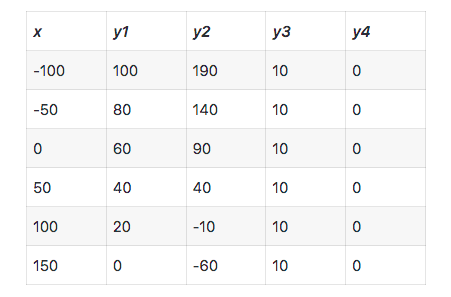

Dada que nuestra quinta restricción pretende hallar x1 a partir de los valores de y, tendríamos lo siguiente:

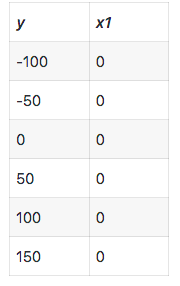

Por último, consideramos la inclusión de la función objetivo, para ello:

$10000x + 6000y = 0$ (Ecuación)

$y = (- 10000x) / 6000$ (Despejamos y)

$y5 = (- 10000x) / 6000$ (Asignamos un identificador único a y)

En este caso, la función que ya asignamos a x (np.arange), nos prestará los valores necesarios para tabular y5.

Lo que hicimos hasta ahora consiste en explicar con alto grado de detalle la función de cada una las líneas del código que utilizaremos en Python. Todo lo anterior queda reducido al siguiente fragmento:

In [11]:
#Ecuaciones e intervalos (Para tabular)
x = np.arange(-100, 150, 50)
y1 = (3000 - (20 * x))/ 50
y2 = 90 - x
y3 = 10 + (0 * x)
y4 = 0 * x
y5 = (-10000 * x) / 6000
y = np.arange(-100, 150, 50)
x1 = 0 * y
z = (-10000 * x) / 6000

## Paso 2: Tabular coordenadas e identificar las líneas

En el paso anterior desarrollamos unas líneas de código que representan los cálculos correspondientes a cada una de las ecuaciones del modelo. Si bien con fines prácticos mostramos la forma en que se tabularían los datos, es hasta este paso en que la información se organiza en tablas (propiamente matrices de dos columnas: x y y). La información se organiza a partir de una instancia básica de la librería Numpy, tal como se explicará a continuación:

np.column_stack((x, y1))

Esta instancia tomará los valores del paso 1 y los tabulará en una matriz 2D (dos columnas). En este ejemplo:
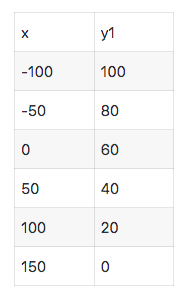

In [12]:
np.column_stack((x, y1))

array([[-100.,  100.],
       [ -50.,   80.],
       [   0.,   60.],
       [  50.,   40.],
       [ 100.,   20.]])

El siguiente paso consiste en, a partir de una instancia básica de la librería Shapely, generar la línea correspondiente a cada ecuación de acuerdo al tabulado generado, tal como se aprecia a continuación:

LineString(np.column_stack((x, y1)))

LineString es una instancia de la librería Shapely que permite unir cada punto (coordenada), de manera que genera una línea. Ahora bien, cada línea de código deberá corresponder o asociarse a una variable única que nos permitirá identificar cada una de las líneas, por ejemplo:

primera_línea = LineString(np.column_stack((x, y1)))

Realizamos el mismo procedimiento para cada una de las líneas, siendo cuidadosos al momento de asignar las variables asociadas a cada una de las líneas:

In [13]:
#Identificadores para las líneas
primera_linea = LineString(np.column_stack((x, y1)))
segunda_linea = LineString(np.column_stack((x, y2)))
tercera_linea = LineString(np.column_stack((x, y3)))
cuarta_linea = LineString(np.column_stack((x1, y)))
quinta_linea = LineString(np.column_stack((x, y4)))
sexta_linea = LineString(np.column_stack((x, y5)))

## Paso 3: Graficar las líneas
El argumento linewidth determinará el grosor de la línea. Debemos considerar asignar las mismas variables que en el paso anterior.

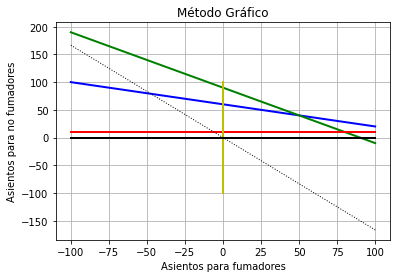

In [17]:
#Graficando las líneas
plt.plot(x, y1, '-', linewidth=2, color='b')
plt.plot(x, y2, '-', linewidth=2, color='g')
plt.plot(x, y3, '-', linewidth=2, color='r')
plt.plot(x1, y, '-', linewidth=2, color='y')
plt.plot(x, y4, '-', linewidth=2, color='k')
plt.plot(x, z, ':', linewidth=1, color='k')

#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Asientos para fumadores')
plt.ylabel('Asientos para no fumadores')
plt.title('Método Gráfico')

plt.show()

## Paso 4: Determinar y graficar las intersecciones

Vamos a utilizar la función intersection() de Python. 

Si queremos determinar la intersección de la línea amarilla (cuarta línea, así la nombramos en el paso anterior) y la línea azul (primera línea), debemos escribir el siguiente código:

primera_interseccion = cuarta_linea.intersection(primera_linea)

In [18]:
#Generando las intersecciones (vértices)
primera_interseccion = cuarta_linea.intersection(primera_linea)
segunda_interseccion = primera_linea.intersection(segunda_linea)
tercera_interseccion = segunda_linea.intersection(tercera_linea)
cuarta_interseccion = tercera_linea.intersection(cuarta_linea)

El espacio de soluciones factibles tienen cuatro intersecciones, de acuerdo al código anterior quedan definidas de acuerdo a los nombres que le asignamos a las variables. Ahora, el paso siguiente consiste en graficar dichas restricciones.

Acá pueden encontrar el listado con los tipos de marcadores (símbolos) que pueden utilizar: marcadores pyplot. Nosotros utilizaremos un marcador en círculo (representado así en el código: «o»).

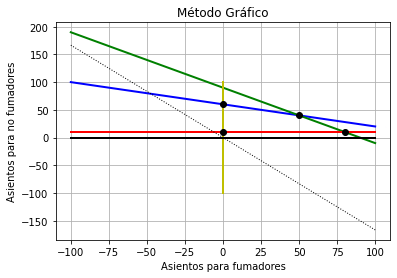

In [20]:
#Graficando las líneas
plt.plot(x, y1, '-', linewidth=2, color='b')
plt.plot(x, y2, '-', linewidth=2, color='g')
plt.plot(x, y3, '-', linewidth=2, color='r')
plt.plot(x1, y, '-', linewidth=2, color='y')
plt.plot(x, y4, '-', linewidth=2, color='k')
plt.plot(x, z, ':', linewidth=1, color='k')

#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Asientos para fumadores')
plt.ylabel('Asientos para no fumadores')
plt.title('Método Gráfico')

#Graficando los vértices
plt.plot(*primera_interseccion.xy, 'o', color='k')
plt.plot(*segunda_interseccion.xy, 'o', color='k')
plt.plot(*tercera_interseccion.xy, 'o', color='k')
plt.plot(*cuarta_interseccion.xy, 'o', color='k')

plt.show()

Lo que necesitamos es el valor numérico de cada punto, y la verdad, ya lo tenemos dentro de nuestras variables; lo que debemos hacer es imprimirlo en la consola de Windows, para eso podemos utilizar el siguiente fragmento:

In [21]:
#Imprimiendo las coordenadas de los vértices en la consola
print('\n COORDENADAS DE LAS INTERSECCIONES')
print('Coordenadas de la primera intersección: {} '.format(primera_interseccion))
print('Coordenadas de la segunda intersección: {} '.format(segunda_interseccion))
print('Coordenadas de la tercera intersección: {} '.format(tercera_interseccion))
print('Coordenadas de la cuarta intersección: {} '.format(cuarta_interseccion))


 COORDENADAS DE LAS INTERSECCIONES
Coordenadas de la primera intersección: POINT (0 60) 
Coordenadas de la segunda intersección: POINT (50 40) 
Coordenadas de la tercera intersección: POINT (80 10) 
Coordenadas de la cuarta intersección: POINT (0 10) 


## Paso 5: Determinar la solución óptima

Ya que nos encontramos trabajando en Python, es necesario aclarar que el valor de los vértices obtenidos corresponde a un formato de tipo point (punto), y que básicamente, no es posible operar cada una de las variables (x, y) que contiene sin antes extraerlas. Por esa razón, lo siguiente que debemos hacer es extraer el valor de cada variable contenida en cada punto de manera independiente:

In [24]:
#Identificando los valores de las coordenadas (x, y) de cada vértice
xi1m, yi1m = primera_interseccion.xy
xi2m, yi2m = segunda_interseccion.xy
xi3m, yi3m = tercera_interseccion.xy
xi4m, yi4m = cuarta_interseccion.xy

#Cambiamos el formato de la variable de matriz a real
xi1 = np.float64(np.array(xi1m))
xi2 = np.float64(np.array(xi2m))
xi3 = np.float64(np.array(xi3m))
xi4 = np.float64(np.array(xi4m))
yi1 = np.float64(np.array(yi1m))
yi2 = np.float64(np.array(yi2m))
yi3 = np.float64(np.array(yi3m))
yi4 = np.float64(np.array(yi4m))

float 64 es un formato que corresponde a números reales, es decir: números que pueden ser positivos o negativos con decimales. En este punto tenemos las variables correspondientes a cada uno de los valores de los vértices en los ejes x y y. Lo siguiente será evaluar la ecuación objetivo en cada uno de los vértices, es decir, en las coordenadas de cada intersección. Por ejemplo:

$FOi1 = (xi1 * 10000) + (yi1 * 6000)$

Creamos la variable FOi1, es decir: La función objetivo en la intersección 1 (vértice 1). La cual multiplicará los coeficientes de la ecuación objetivo por el valor de la variable xi1 y yi1, es decir, las coordenadas x y y en el vértice 1. En este caso, y ya que conocemos estos valores (los hemos impreso en la consola), generaría el siguiente resultado:

$FOi1 = (0 * 10000) + (60 * 6000)$

$FOi1 = 360000$

Lo que equivale a decir que el resultado de la función objetivo en el vértice 1 es igual a 360.000. Así entonces, generamos el fragmento de código de estas ecuaciones y variables, así como las funciones que permitan que estos valores se impriman en la consola:

In [25]:
#Evaluando la función objetivo en cada vértice
FOi1 = (xi1 * 10000) + (yi1 * 6000)
FOi2 = (xi2 * 10000) + (yi2 * 6000)
FOi3 = (xi3 * 10000) + (yi3 * 6000)
FOi4 = (xi4 * 10000) + (yi4 * 6000)

#Imprimiendo las evaluaciones de la FO en cada vértice (Consola)
print('\n EVALUACIÓN DE LA FO EN LOS VÉRTICES')
print('Función objetivo en la intersección 1: {} pesos'.format(FOi1))
print('Función objetivo en la intersección 2: {} pesos'.format(FOi2))
print('Función objetivo en la intersección 3: {} pesos'.format(FOi3))
print('Función objetivo en la intersección 4: {} pesos'.format(FOi4))


 EVALUACIÓN DE LA FO EN LOS VÉRTICES
Función objetivo en la intersección 1: 360000.0 pesos
Función objetivo en la intersección 2: 740000.0 pesos
Función objetivo en la intersección 3: 860000.0 pesos
Función objetivo en la intersección 4: 60000.0 pesos


$ZMAX = max(FOi1, FOi2, FOi3, FOi4)$

Creamos la variable ZMAX, es decir: La variable que contendrá el valor máximo entre las variables que contienen los valores de la función objetivo en cada vértice. Así entonces obtendremos de una muy sencilla, nuestra solución óptima. El siguiente código creará la variable y la función que permitirá que se imprima dicho resultado en la consola:

In [26]:
#Calculando el mejor resultado (Maximizar)
ZMAX = max(FOi1, FOi2, FOi3, FOi4)

#Imprimiendo la solución óptima en la consola
print('\n SOLUCIÓN ÓPTIMA')
print('Solución óptima: {} pesos'.format(ZMAX))


 SOLUCIÓN ÓPTIMA
Solución óptima: 860000.0 pesos


Lo primero que vamos a hacer es organizar la información, es decir, crear un vector que almacene los valores de cada variable (sea x o y) en todos los vértices, por ejemplo:

$m = [xi1, xi2, xi3, xi4]$

El vector m contendrá los valores (ordenados) de las variables x en cada uno de los vértices, empezando por el vértice 1 y finalizando en el vértice 4. Lo mismo realizamos con las variables y.

$n = [yi1, yi2, yi3, yi4]$

En este punto, y con la información tal cual como tenemos organizada, podemos realizar un pequeño aporte al gráfico: rellenar nuestro polígono solución. Para eso, utilizamos una función llamada fill, y nuestros vectores recién creados:

plt.fill(m, n, color=’silver’)

Esta función utiliza los vectores m y n para crear un relleno en el gráfico al desplazarse por los puntos de los vectores (coordenadas), en sentido de las manecillas del reloj. Es decir, iniciará en el vértice 1 y finalizará en el vértice 4. Además, hemos especificado que el color de este relleno sea silver:

In [28]:
#Ordenando las coordenadas de los vértices (Las coordenadas x en m y las coordenadas y en n)
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]

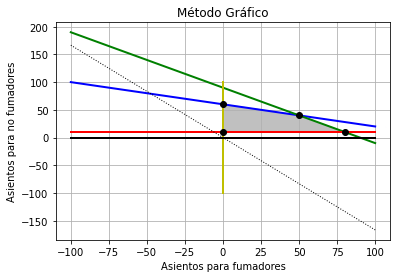

In [29]:
#Graficando las líneas
plt.plot(x, y1, '-', linewidth=2, color='b')
plt.plot(x, y2, '-', linewidth=2, color='g')
plt.plot(x, y3, '-', linewidth=2, color='r')
plt.plot(x1, y, '-', linewidth=2, color='y')
plt.plot(x, y4, '-', linewidth=2, color='k')
plt.plot(x, z, ':', linewidth=1, color='k')

#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Asientos para fumadores')
plt.ylabel('Asientos para no fumadores')
plt.title('Método Gráfico')

#Graficando los vértices
plt.plot(*primera_interseccion.xy, 'o', color='k')
plt.plot(*segunda_interseccion.xy, 'o', color='k')
plt.plot(*tercera_interseccion.xy, 'o', color='k')
plt.plot(*cuarta_interseccion.xy, 'o', color='k')

#Graficando el polígono solución a partir de las coordenadas de los vértices 
plt.fill(m, n, color='silver')

plt.show()

Volvamos a nuestro directorio. Lo que vamos a hacer es crear un arreglo con las variables que contienen los resultados de las funciones objetivo (FOi1, FOi2, FOi3 y FOi4), y a cada uno le asignaremos un índice de acuerdo a su orden (ya veremos para qué). Por ejemplo:

$dict1 = {0:FOi1, 1:FOi2, 2:FOi3, 3:FOi4}$

Así entonces, a cada variable le asignamos un número inicia en 0 y finaliza en 3 (ya veremos para qué). La variable dict hace referencia a nuestro directorio, y dentro de él se encuentra el arreglo con nuestros índices.

Lo siguiente que haremos es extraer el índice, no la variable de este arreglo, de acuerdo al mayor valor de la variable, no del índice. Es decir, una función que evalúe las variables de las funciones objetivo, y en lugar de devolvernos dicho valor, nos traiga el índice que tiene al lado. Nosotros de antemano conocemos que el mayor valor es el de FOi3, por esta razón, la función debe arrojarnos como respuesta el índice 2 (2:FOi3). ¿Por qué no iniciamos desde 1 y sí desde 0? En Python, las posiciones dentro de un arreglo inician desde 0.

La siguiente función nos traerá el índice de acuerdo al mayor valor de la variable:

$posicion = max(dict1, key=dict1.get)$

Así entonces, el valor de las coordenadas del vértice solución la obtenemos de la siguiente forma:

$XMAX = m[posicion] YMAX = n[posicion]$

La variable XMAX tomará el valor de la variable x que se encuentra en el vector m en la posición de la variable posicion. Es decir, corresponderá al valor de la variable x en el vértice solución. Veamos:

In [30]:
#Identificando el índice del vértice de la mejor solución
dict1 = {0:FOi1, 1:FOi2, 2:FOi3, 3:FOi4}
posicion = max(dict1, key=dict1.get)

#Obteniendo las coordenadas del vértice de la mejor solución de acuerdo al índice
XMAX = m[posicion]
YMAX = n[posicion]

#Imprimiendo las coordenadas del vértice de la mejor solución (variables de decisión)
print('\n VARIABLES DE DECISIÓN')
print('Cantidad de asientos a reservar para fumadores: {} '.format(XMAX))
print('Cantidad de asientos a reservar para no fumadores: {} '.format(YMAX))


 VARIABLES DE DECISIÓN
Cantidad de asientos a reservar para fumadores: 80.0 
Cantidad de asientos a reservar para no fumadores: 10.0 


Podemos hacer algunos ajustes accesorios, todos a elección del desarrollador. En este caso, vamos a agregar un par de líneas de código que permitan adicionar al gráfico un par de anotaciones con las coordenadas del vértice solución y el valor la solución óptima. Veamos:

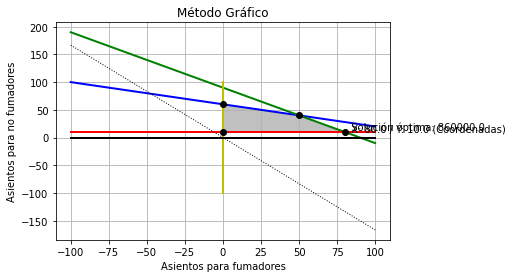

In [32]:
#Graficando las líneas
plt.plot(x, y1, '-', linewidth=2, color='b')
plt.plot(x, y2, '-', linewidth=2, color='g')
plt.plot(x, y3, '-', linewidth=2, color='r')
plt.plot(x1, y, '-', linewidth=2, color='y')
plt.plot(x, y4, '-', linewidth=2, color='k')
plt.plot(x, z, ':', linewidth=1, color='k')

#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Asientos para fumadores')
plt.ylabel('Asientos para no fumadores')
plt.title('Método Gráfico')

#Graficando los vértices
plt.plot(*primera_interseccion.xy, 'o', color='k')
plt.plot(*segunda_interseccion.xy, 'o', color='k')
plt.plot(*tercera_interseccion.xy, 'o', color='k')
plt.plot(*cuarta_interseccion.xy, 'o', color='k')

#Graficando el polígono solución a partir de las coordenadas de los vértices 
plt.fill(m, n, color='silver')

#Generando las anotaciones de las coordenadas y solución óptima en el gráfico
plt.annotate('  X: {0} / Y: {1} (Coordenadas)'.format(XMAX, YMAX), (XMAX, YMAX))
plt.annotate('  Solución óptima: {}'.format(ZMAX), (XMAX, YMAX+3))

plt.show()

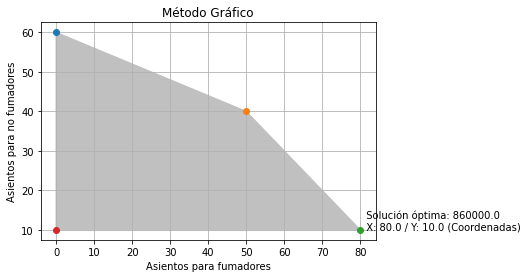

In [33]:
#Generando las intersecciones (vértices)
primera_interseccion = cuarta_linea.intersection(primera_linea)
segunda_interseccion = primera_linea.intersection(segunda_linea)
tercera_interseccion = segunda_linea.intersection(tercera_linea)
cuarta_interseccion = tercera_linea.intersection(cuarta_linea)

#Graficando los vértices
plt.plot(*primera_interseccion.xy, 'o')
plt.plot(*segunda_interseccion.xy, 'o')
plt.plot(*tercera_interseccion.xy, 'o')
plt.plot(*cuarta_interseccion.xy, 'o')

#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Asientos para fumadores')
plt.ylabel('Asientos para no fumadores')
plt.title('Método Gráfico')

#Ordenando las coordenadas de los vértices (Las coordenadas x en m y las coordenadas y en n)
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]

#Graficando el polígono solución a partir de las coordenadas de los vértices (importante el orden según las manecillas)
plt.fill(m, n, color='silver')

#Generando las anotaciones de las coordenadas y solución óptima en el gráfico
plt.annotate('  X: {0} / Y: {1} (Coordenadas)'.format(XMAX, YMAX), (XMAX, YMAX))
plt.annotate('  Solución óptima: {}'.format(ZMAX), (XMAX, YMAX+3))

plt.show()